In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')

In [7]:
df = pd.read_parquet('../data/01-08-2023/FEATURE_DATA_RAW')
df

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_HOLD,CASA_BAL_SUM_NOW,CASA_BAL_SUM_36M,...,CASA_BAL_SUM_12M,CASA_BAL_MAX_12M,CASA_TXN_AMT_SUM_12M,CASA_TXN_AMT_SUM_24M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_24M,CASA_TXN_CT_12M,CASA_ACCT_CT_36M,CASA_ACCT_ACTIVE_CT_12M,CASA_DAY_SINCE_LAST_TXN_CT_36M
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
1147729,VN0010006,"Kinh doanh tai san, dich vu tu van",Trước Gen X,Cuối sự nghiệp,64,5106,None,1,118964519,5618276072,...,949094699,138212815,3914095806,9127564444,14925840699,186,89,2,2,1
2272671,VN0010003,"HDong Dang, Doan The va Hiep Hoi",Gen X,Thiết lập tài sản,44,4445,None,1,21076114,4345155893,...,2247746727,247210798,8641399706,13811365104,14374117892,221,122,1,1,1
9810183,VN0010006,"Qly nha nuoc, an ninh, quoc phong",Gen X,Bảo vệ tài sản,54,2450,None,1,5147766,72882903,...,45832865,5147766,1376687499,1739561955,1739561955,39,21,1,1,1
8237138,VN0010006,"Kinh doanh tai san, dich vu tu van",Trước Gen X,Nghỉ hưu,80,2697,None,1,366494,329099083,...,80024270,8477334,1574004109,1574004109,1653712871,7,7,1,1,1
5724871,VN0010008,"Nong, lam nghiep",Gen X,Thiết lập tài sản,45,3123,None,1,1989910429,54089792917,...,27808046580,2602659823,22028806000,39453473839,50699351839,666,429,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529301,VN0010008,"Thuong nghiep, sua chua",Gen Y,Lập gia đình,31,2271,None,1,13466376,883682427,...,304431137,43245340,722413615,1020982615,2580182615,119,90,1,1,1
10511410,VN0010007,"Kinh doanh tai san, dich vu tu van",Gen Z,Bắt đầu sự nghiệp,23,2274,None,1,24747616,53544882,...,53544882,24747616,31909999,31909999,31909999,17,17,1,1,1
10524429,VN0010003,Unknown,Gen Y,Thiết lập tài sản,40,2272,None,1,17880219,620640755,...,450969800,58383406,14366203558,80075293942,84937243942,704,292,1,1,1


In [9]:
df.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'LOR', 'CREDIT_SCORE',
       'CASA_HOLD', 'CASA_BAL_SUM_NOW', 'CASA_BAL_SUM_36M', 'CASA_BAL_SUM_24M',
       'CASA_BAL_SUM_12M', 'CASA_BAL_MAX_12M', 'CASA_TXN_AMT_SUM_12M',
       'CASA_TXN_AMT_SUM_24M', 'CASA_TXN_AMT_SUM_36M', 'CASA_TXN_CT_24M',
       'CASA_TXN_CT_36M', 'CASA_TXN_CT_12M', 'CASA_ACCT_CT_36M',
       'CASA_ACCT_ACTIVE_CT_12M', 'CASA_DAY_SINCE_LAST_TXN_CT_36M'],
      dtype='object')

In [10]:
X = df

In [13]:
y = pd.read_parquet('../data/01-01-2023/REACTIVATED_CASA')
y = y[['CUSTOMER_CDE', 'FTR_VAL']]
y.rename(columns={'FTR_VAL': 'REACTIVATED_CASA'}, inplace=True)

In [14]:
y

,CUSTOMER_CDE,REACTIVATED_CASA
0,6708345,1
1,4131389,0
2,17174047,0
3,17313854,0
4,17084043,0
...,...,...
1013740,17515601,1
1013741,17479714,0
1013742,17519651,0
1013743,16870958,0


In [8]:
model = pickle.load(open('../model/pipeline_xgboost_casa_forward_12mob','rb'))
model

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['CASA_HOLD']),
                                                 ('num2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOR', 'CREDIT_SCORE',
                                                   'CASA_BAL_SUM_NOW',
                                                   'CASA_BAL_SUM_36M',
                                                   'CASA_BAL_SUM_24M',
                                                   'CASA_BAL_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [9]:
model[:-1].get_feature_names_out()

array(['num1__CASA_HOLD', 'num2__LOR', 'num2__CREDIT_SCORE',
       'num2__CASA_BAL_SUM_NOW', 'num2__CASA_BAL_SUM_36M',
       'num2__CASA_BAL_SUM_24M', 'num2__CASA_BAL_SUM_12M',
       'num2__CASA_BAL_MAX_12M', 'num2__CASA_TXN_AMT_SUM_36M',
       'num2__CASA_TXN_AMT_SUM_24M', 'num2__CASA_TXN_AMT_SUM_12M',
       'num2__CASA_TXN_CT_36M', 'num2__CASA_TXN_CT_24M',
       'num2__CASA_TXN_CT_12M', 'num2__CASA_ACCT_CT_36M',
       'num2__CASA_ACCT_ACTIVE_CT_12M',
       'num2__CASA_DAY_SINCE_LAST_TXN_CT_36M', 'cat__AREA_VN0010001',
       'cat__AREA_VN0010002', 'cat__AREA_VN0010003',
       'cat__AREA_VN0010004', 'cat__AREA_VN0010005',
       'cat__AREA_VN0010006', 'cat__AREA_VN0010007',
       'cat__AREA_VN0010008', 'cat__AREA_None',
       'cat__PROFESSION_Cong nghiep che bien, san xuat',
       'cat__PROFESSION_Cong nghiep khai thac',
       'cat__PROFESSION_Giao duc, dao tao',
       'cat__PROFESSION_HDong Dang, Doan The va Hiep Hoi',
       'cat__PROFESSION_Khoa hoc, cong nghe',
     

<Axes: >

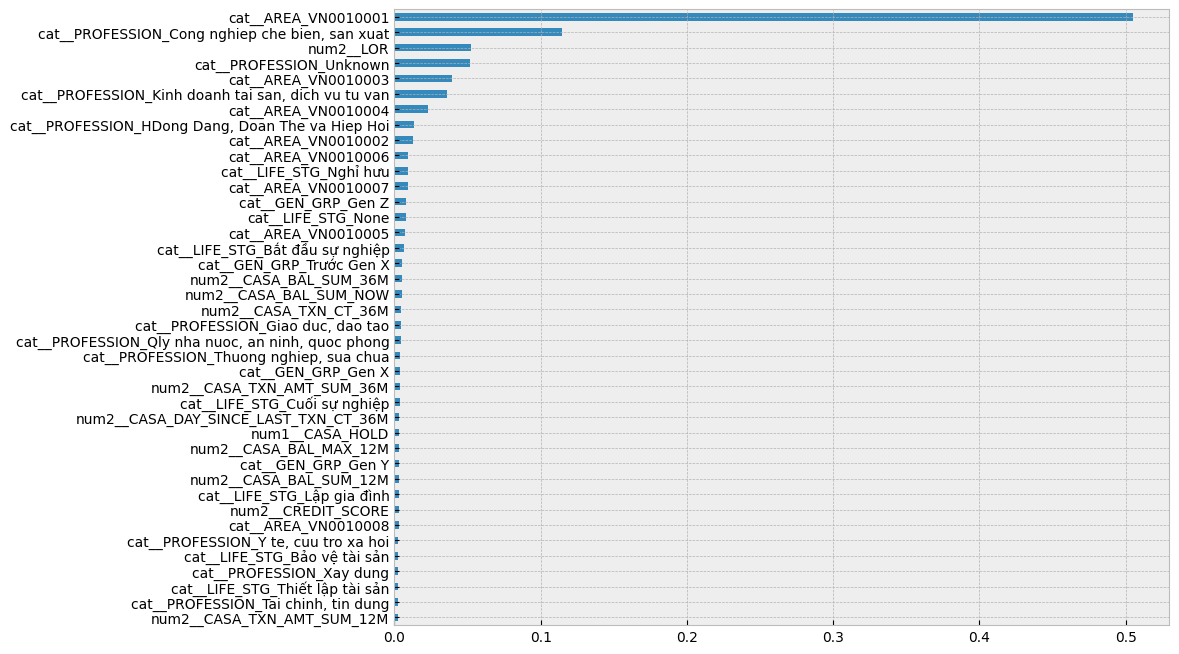

In [10]:
featimp_series = pd.Series(model[-1].feature_importances_, index=model[:-1].get_feature_names_out())
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [8]:
y_pred = model.predict(X)
y_prob = model.predict_proba(X)

NameError: name 'X' is not defined

In [8]:
from sklearn import metrics
import seaborn as sns

In [9]:
pd.Series(y_pred).value_counts(), pd.Series(y_pred).value_counts(normalize=True)

(0    7531955
 1      57044
 dtype: int64,
 0    0.992483
 1    0.007517
 dtype: float64)

<Axes: ylabel='Density'>

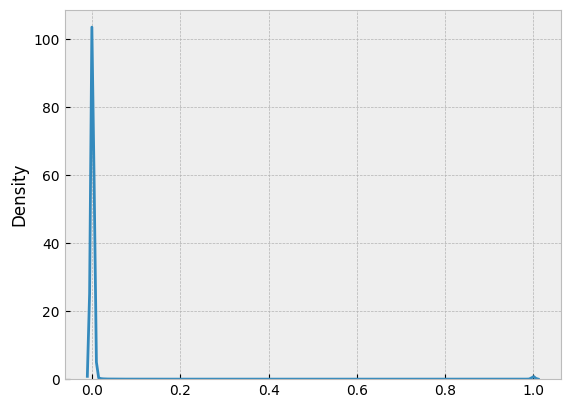

In [29]:
sns.kdeplot(y_prob[:,1])

In [12]:
p,r,f,_ = metrics.precision_recall_fscore_support(y, y_pred)
auc = metrics.roc_auc_score(y, y_prob[:,1])
gini = 2 * auc - 1
print(p,r,f)
print(auc,gini)
print(metrics.classification_report(y, y_pred))

[0.9991775  0.98984994] [0.99992307 0.9011331 ] [0.99955015 0.94341041]
0.9801699362330998 0.9603398724661996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7526339
           1       0.99      0.90      0.94     62660

    accuracy                           1.00   7588999
   macro avg       0.99      0.95      0.97   7588999
weighted avg       1.00      1.00      1.00   7588999



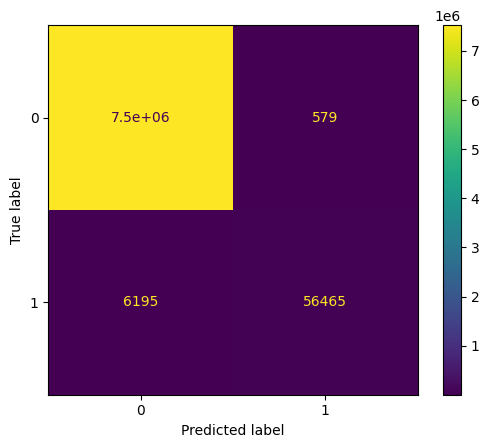

In [13]:
metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)

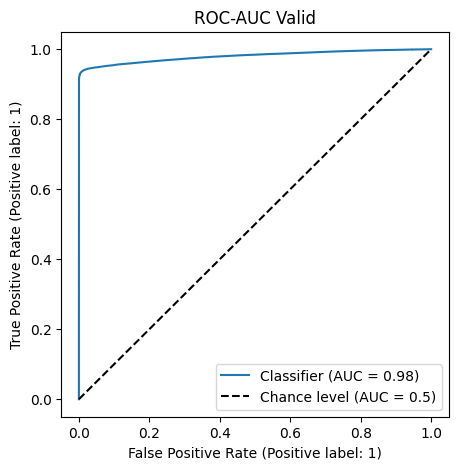

In [14]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.RocCurveDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('ROC-AUC Valid')
plt.grid = True
plt.show()

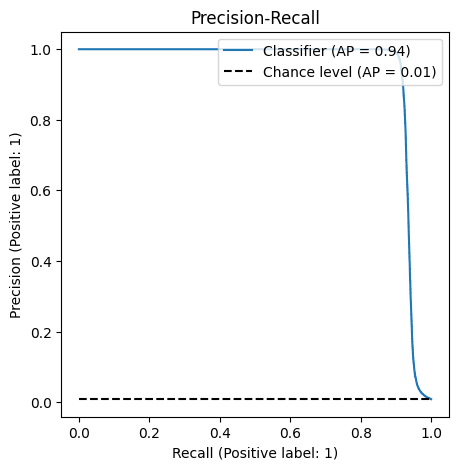

In [15]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.PrecisionRecallDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('Precision-Recall')
axs.legend(loc='upper right')
plt.show()

In [16]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

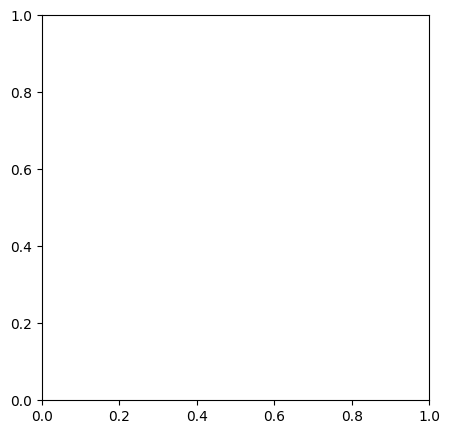

In [17]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))
plot_precision_recall_with_thresholds(y, y_prob[:,1], ax=axs)
axs.set_title('Pre/Rec/F1 vs Thresholds')
plt.show()